## 기본적인 EDA 접근 방식
- 데이터의 특징을 탐색하는 과정으로 시각화, 통계량, 더 나아가 모델링 기법을 통해 데이터에 내재된 패턴 파악

### 1. 기본적인 문제 정의 & 분석 목표 설정
- 이 데이터는 무엇을 보여주고 싶은가?
- 데이터에 담긴 값의 의미를 생각해보기
- 타겟 변수(궁금한 값)이 있는가?
- 어떤 관계를 탐색할 것인가? (타겟 변수에 영향을 주는 요인이 무엇인지?)
- 가설 설정 등

### 2. 데이터의 구조 파악하기
- 데이터의 행/열 개수
- 각 변수의 데이터 유형
- 기초적인 통계량(평균, 최대, 최소, 최빈, 빈도, 고유값, 중앙값 등)

### 3. 데이터의 품질 점검하기 (결측치/중복/이상치)
- 결측치 탐색하기(그에 따른 처리 전략 수립)
- 중복 데이터 탐색하기
  - pandas의 duplicated() 함수
- boxplot 또는 IQR(Inter-Quartile Range) 활용하여 이상치 탐색하기

### 4. 단변량 분석(단일 변수에 대한 탐색)
- 각 변수의 통계량, 분포를 통해 패턴 탐색
- 수치형 데이터: 히스토그램, 박스플롯 등
- 범주형 데이터: countplot, 파이 차트 등
> 이 변수는 어떻게 생겼는가? 어떠한 형태? 어떠한 패턴?

### 5. 이변량 분석(두 변수 간의 관계 탐색)
- 타겟 변수와 다른 변수와의 패턴/관계? (또는 서로 다른 변수 간의 관계)
- 수치형 x 수치형: 산점도, 상관관계 등
- 범주형 x 수치형: 박스플롯, 바이올린 플롯 등
- 범주형 x 범주형: 파이 차트, 막대 그래프, 히트맵 등
> 한 변수가 다른 변수에 영향을 주는가?

### 6. 다변량 분석(여러 개 변수 간의 관계 및 전체적인 패턴 파악)
- 복합적인 여러 개의 변수간의 패턴 파악
- 상관관계 히트맵
- seaborn의 pairplot() 함수

### 7. 핵심 인사이트 도출 및 결과 요약 정리
- 어떤 변수가 타깃에 가장 큰 영향을 주는가?
- 데이터의 분포적 특징은 무엇인가?
- 노이즈/편향/한계점 등은 무엇인가?
- 분석 목적에 맞는 설명 정리
- 핵심 그래프 선정
- 변수 간 주요 관계 요약
- 데이터의 특성·문제점·해석 가능한 인사이트 정리


*필요에 따라 파생 변수 생성 등 활용*

# 와인 데이터 분석

Wine Quality 데이터셋: 포르투갈 “Vinho Verde” 와인의
화학적 성질과 전문가들에 의해 매겨진 품질 점수(0~10)를 기록한 것이다.

레드 와인과 화이트 와인 두 버전이 있으며,
와인의 품질이 어떤 물리·화학적 요소와 관련되는지 분석하기 위해 만들어졌다.
(와인의 품질(quality)을 예측하기 위한 회귀/분류 연구)
- `winequality-red.csv` : 레드 와인 데이터셋

| 컬럼 이름 | 설명 |
| --- | --- |
| `fixed acidity` | 고정 산도 |
| `volatile acidity` | 휘발성 산도 |
| `citric acid` | 시트르산 |
| `residual sugar` | 잔류 당분 |
| `chlorides` | 염화물 |
| `free sulfur dioxide` | 유리 이산화황 |
| `total sulfur dioxide` | 총 이산화황 |
| `density` | 밀도 |
| `pH` | 산성도 |
| `sulphates` | 황산염 |
| `alcohol` | 알코올 도수 |
| `quality` | 품질 점수 (0-10점); 타겟 변수 |

## Guide
- 자유롭게 각 작업마다 코드 셀을 추가해서 EDA를 진행해보세요!
  - 코드 셀 추가하는 단축키 : esc + b
- 각 스텝마다에서 얻어진 객관적 사실을 각각 정리해보세요!
- 분석 진행이나 컬럼/값의 의미/해석 등을 생성형 AI의 도움을 통해 아이디어를 받아보세요!
- 아래의 코드셀의 스텝 설명들은 일종의 가이드입니다.



## 데이터의 기본 구조 파악하기
- 데이터의 정보 파악하기
- 데이터의 요약 통계량, 데이터 타입 등 확인
- 변수의 단위 파악 (산도, 당도, 알콜, 밀도 등)
- 타겟 변수인 quality의 분포(0~10), 통계량 확인

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 한글 깨짐 방지 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('C:\sesac_mingyo\csv전용파일\winequality-red.csv',sep=';')
#데이터 행 과 열  수 확인
df.shape

(1599, 12)

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [36]:
#데이터 타입 확인
print(df.shape)
df.info()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
#데이터 요약 통계량
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [37]:
#
df["fixed acidity"].value_counts()

fixed acidity
7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
14.3     1
12.1     1
15.9     1
4.9      1
5.5      1
Name: count, Length: 96, dtype: int64

In [17]:
df["residual sugar"].head()

0    1.9
1    2.6
2    2.3
3    1.9
4    1.9
Name: residual sugar, dtype: float64

## 데이터의 품질 확인하기
- 결측치 탐색(확인, 비율)
- 중복 데이터 확인
- boxplot으로 각 feature의 이상치 탐색
- IQR로 정량적 이상치 판단 (개수, 비율 등)

In [19]:
#결측치 탐색
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [24]:
#전체 데이터 프레임에서 중복데이터는 240개
df.duplicated().sum()

np.int64(240)

<Axes: xlabel='quality', ylabel='count'>

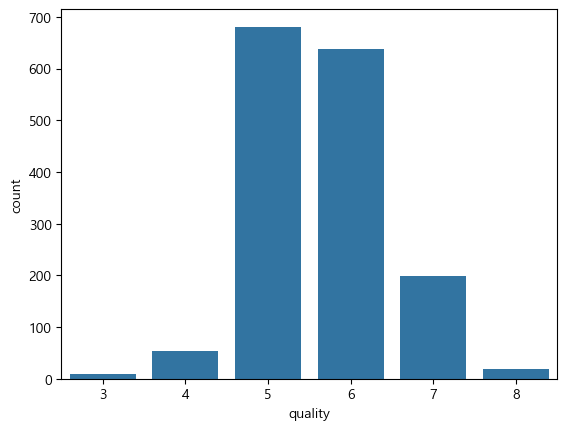

## 단변량 분석
- 타겟 변수인 quality의 분포를 다양하게 확인해보기
  - ex) 좋은 와인 vs 나쁜 와인 처럼 이분화하여 그룹 비교
- 변수의 분포 파악 (데이터 유형에 따라)



## 이변량, 다변량 분석
- 타겟 변수인 quality 변수와 다른 각각의 변수와의 관계성 파악하기
  - 산점도, 막대 그래프, 상관관계
  - ex) alchol vs. quality, quality별 평균 값 비교
- 그 외의 변수 간의 관계 파악하기

## 핵심 인사이트 정리
- 품질 높은 와인은 어떤 경향을 가진다? 등
- 산도/당도/알코올이 품질과 어떤 관계가 있는가? 등
- 데이터의 한계 및 왜곡 가능성 등등

<Axes: xlabel='quality', ylabel='count'>

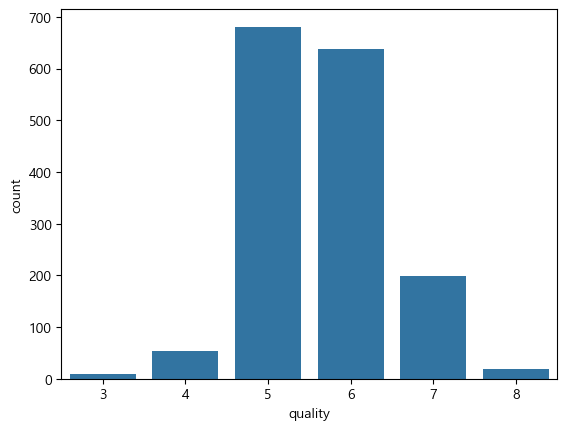

In [33]:

#Step 1. 품질 분포 파악
sns.countplot(x=df["quality"])
# 5에서 6등급인 와인들이 많이 분포하였다

In [35]:
#Step 2. 수치형 변수들의 기본 통계 확인
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<Axes: xlabel='residual sugar'>

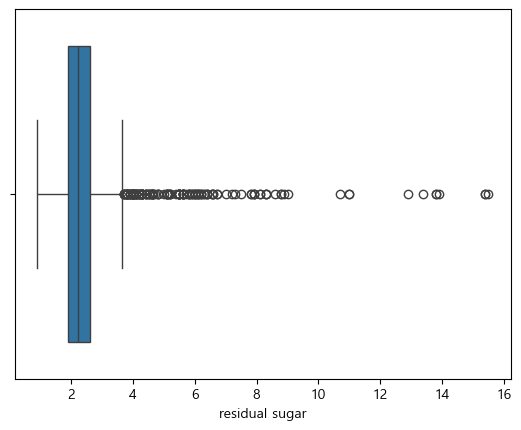

In [41]:
#Step 3. 수치형 변수의 분포 확인(Outlier 체크)
sns.boxplot(data=df,x="residual sugar")

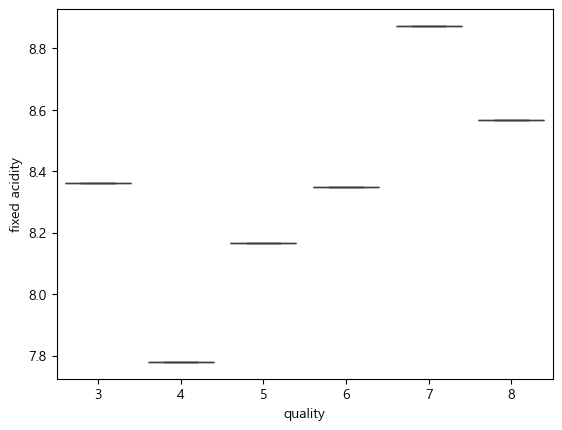

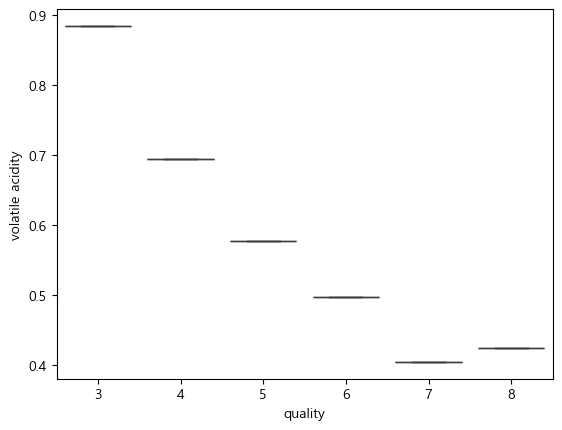

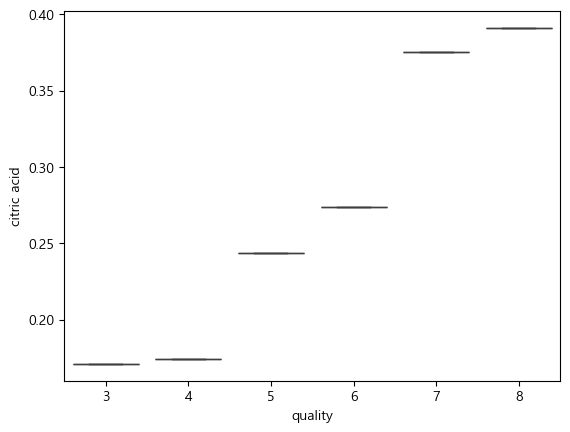

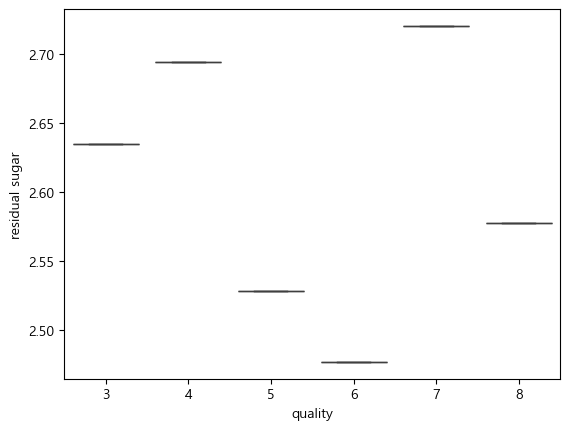

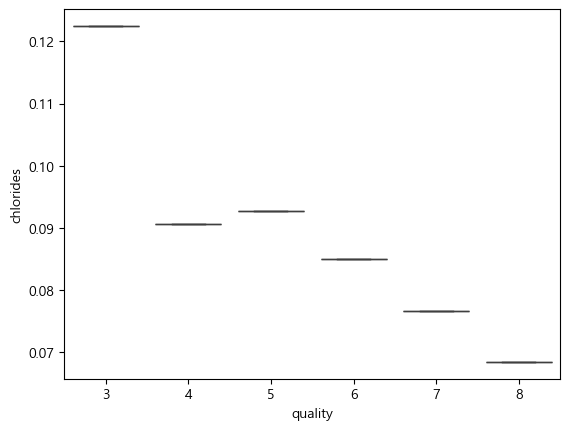

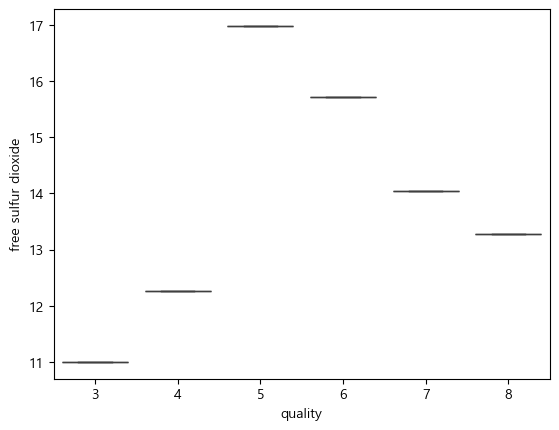

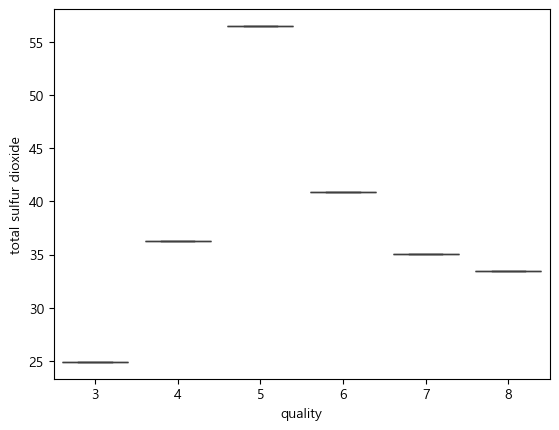

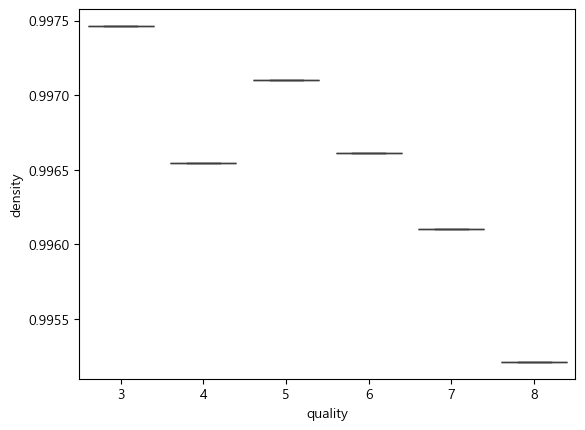

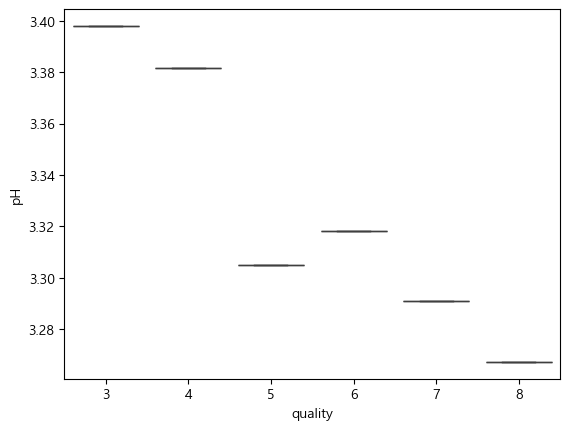

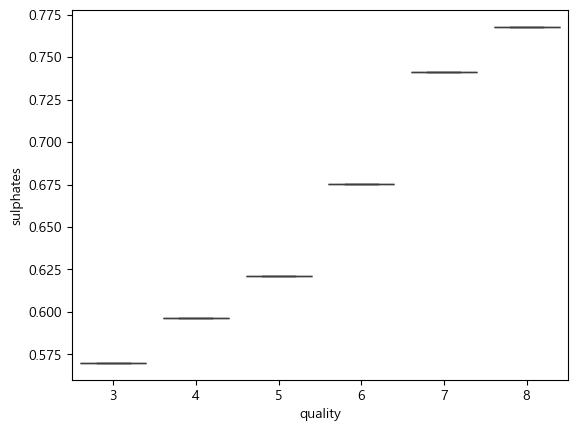

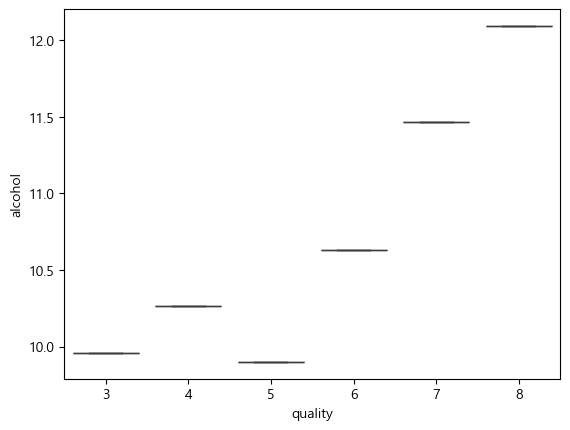

In [44]:
#Step 4. quality별로 평균 비교 → 가장 중요한 단계
for col in df.columns:
    if col == "quality":
        break
    test = df.groupby("quality")[col].mean().reset_index()
    plt.figure()
    sns.boxplot(data=test, x="quality", y=col)

<Axes: >

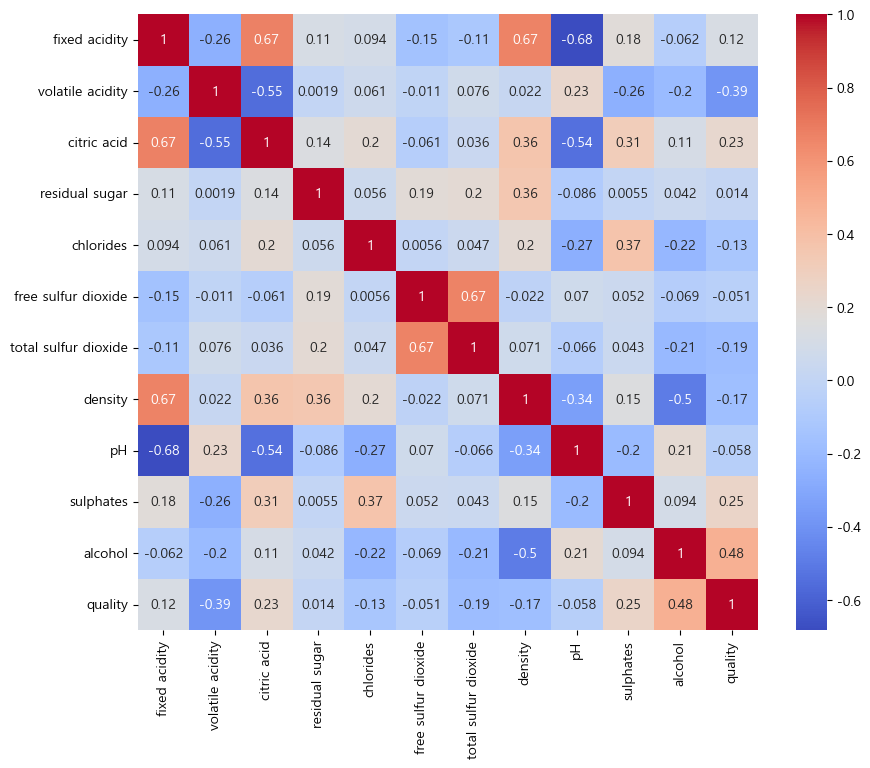

In [46]:
#Step 5. 상관관계 분석 (correlation heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

<Axes: xlabel='alcohol', ylabel='quality'>

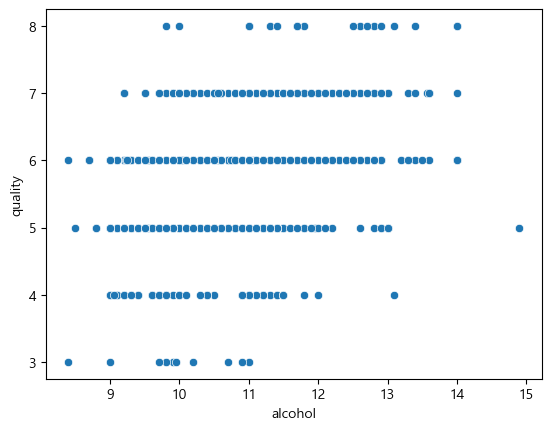

In [47]:
sns.scatterplot(data=df, x="alcohol", y="quality")